# Code to calibrate camera for open field recordings (from)

https://medium.com/vacatronics/3-ways-to-calibrate-your-camera-using-opencv-and-python-395528a51615

In [108]:
import cv2
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt
def calibrate_chessboard(dir_path, image_format, square_size, width, height):
    '''Calibrate a camera using chessboard images.'''
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 60, 0.01)
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
    objp = np.zeros((height*width, 3), np.float32)
    objp[:, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

    objp = objp * square_size

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d point in real world space
    imgpoints = []  # 2d points in image plane.

    images = [os.path.join(dir_path,i) for i in os.listdir(dir_path) if image_format in i]#
    #images = pathlib.Path(dir_path).glob(f'*.{image_format}')
    print(list(images))
    # Iterate through all images
    for fname in images:
        img = cv2.imread(str(fname))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (width, height), None)
        #print(ret,corners)
        # If found, add object points, image points (after refining them)
        if ret:
            objpoints.append(objp)

            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)

    # Calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return [ret, mtx, dist, rvecs, tvecs]
#view rawchessboard.py hosted with ❤ by GitHub

In [109]:

import cv2

def save_coefficients(mtx, dist, path):
    '''Save the camera matrix and the distortion coefficients to given path/file.'''
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_WRITE)
    cv_file.write('K', mtx)
    cv_file.write('D', dist)
    # note you *release* you don't close() a FileStorage object
    cv_file.release()

def load_coefficients(path):
    '''Loads camera matrix and distortion coefficients.'''
    # FILE_STORAGE_READ
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_READ)

    # note we also have to specify the type to retrieve other wise we only get a
    # FileNode object back instead of a matrix
    camera_matrix = cv_file.getNode('K').mat()
    dist_matrix = cv_file.getNode('D').mat()

    cv_file.release()
    return [camera_matrix, dist_matrix]


In [110]:
# Parameters
IMAGES_DIR = '/Users/yweissenberger/Desktop/OF_chess2/'
IMAGES_FORMAT = '.png'
SQUARE_SIZE = 2.5
WIDTH = 6
HEIGHT = 8

# Calibrate 
ret, mtx, dist, rvecs, tvecs = calibrate_chessboard(
    IMAGES_DIR, 
    IMAGES_FORMAT, 
    SQUARE_SIZE, 
    WIDTH, 
    HEIGHT
)

#mtx is the camera matrix, dist are the distortion coefficients
# Save coefficients into a file
save_coefficients(mtx, dist, "calibration_chessboard.yml")

['/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142600.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142618.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142628.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142640.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142648.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142711.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142955.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-143001.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-143006.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-143012.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-143017.png', '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-143022.png']


In [111]:
import cv2

def save_coefficients(mtx, dist, path):
    '''Save the camera matrix and the distortion coefficients to given path/file.'''
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_WRITE)
    cv_file.write('K', mtx)
    cv_file.write('D', dist)
    # note you *release* you don't close() a FileStorage object
    cv_file.release()

def load_coefficients(path):
    '''Loads camera matrix and distortion coefficients.'''
    # FILE_STORAGE_READ
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_READ)

    # note we also have to specify the type to retrieve other wise we only get a
    # FileNode object back instead of a matrix
    camera_matrix = cv_file.getNode('K').mat()
    dist_matrix = cv_file.getNode('D').mat()

    cv_file.release()
    return [camera_matrix, dist_matrix]

In [115]:
dist

array([[-0.15358426,  0.03000481,  0.01064163,  0.00121856,  0.01550307]])

In [112]:
pth = '/Users/yweissenberger/Desktop/OF_chess2/16401324-2021-06-14-142711.png'
# Load coefficients
mtx, dist = load_coefficients('calibration_chessboard.yml')
original = cv2.imread(pth)
dst = cv2.undistort(original, mtx, dist, None, None)
cv2.imwrite('undist.jpg', dst)


True

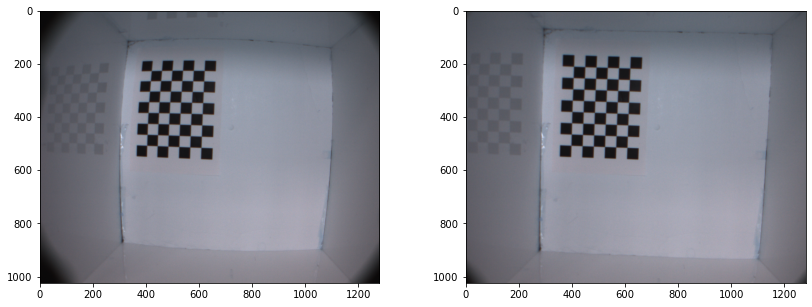

In [113]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(original)

plt.subplot(1,2,2)
plt.imshow(dst)